# Scénario

Aujourd’hui est un grand jour, vous commencez votre mission en tant que data analyst freelance chez BottleNeck, un marchand de vin très prestigieux. Votre manager sur cette mission (Laurent) vous accueille chaleureusement et vous propose de partager un petit café avec le reste de l’équipe du service Digital. L’ambiance est bonne, et vous voilà déjà parfaitement intégré dans cette équipe détendue mais professionnelle.

![Food](https://user.oc-static.com/upload/2020/11/23/16061348800222_Capture%20d%E2%80%99e%CC%81cran%202020-11-23%20a%CC%80%2013.33.23.png)

Après les premières présentations, effectuées dans une ambiance des plus conviviales, Laurent vous explique les enjeux de votre première mission :

## Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Charger et voir les données 

In [101]:
url = 'D:\\Downloads\\erp.csv'
df_1 = pd.read_csv(url, index_col=0, encoding = "utf-8")
df_erp=df_1.copy()

url = 'D:\\Downloads\\web.csv'
df_1 = pd.read_csv(url, index_col=0, encoding = "utf-8")
df_web=df_1.copy()

url = 'D:\\Downloads\\liaison.csv'
df_1 = pd.read_csv(url, index_col=0, encoding = "utf-8")
df_liaison=df_1.copy()

## Déclaration des fonctions

In [48]:
def keyTester(df):
    """Fonction qui vérifie si la clé du dataframe peut être utilisée comme clé primaire"""
    # On compare la taille du dataframe avant et après la suppression des doublons
    if df.size == df[~df.index.duplicated(keep='first')].size :
        print("La clé peut être utilisée comme clé primaire car elle est unique")
    else:
        print("La clé ne peut être utilisée comme clé primaire car elle n'est pas unique")
        print(f"Voici le nombre de doublons : {df.index[df.index.duplicated(keep='first')].nunique()}")
    
    # On print la forme du Dataframe
    print(f"Le dataframe contient {df.shape} (lignes, colonnes)")


## Analyse de la forme des données

### 1- Données de l’ERP contenant les références produit, leur prix de vente et leur état de stock

In [4]:
df_erp.head()

,onsale_web,price,stock_quantity,stock_status
product_id,,,,
3847,1,24.2,0,outofstock
3849,1,34.3,0,outofstock
3850,1,20.8,0,outofstock
4032,1,14.1,0,outofstock
4039,1,46.0,0,outofstock


In [26]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 3847 to 7338
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   onsale_web      825 non-null    int64  
 1   price           825 non-null    float64
 2   stock_quantity  825 non-null    int64  
 3   stock_status    825 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 32.2+ KB


#### Compter les valeurs NaN

In [58]:
(df_erp.isnull().sum()/df_erp.shape[0]).sort_values(ascending=True)* 100

onsale_web        0.0
price             0.0
stock_quantity    0.0
stock_status      0.0
dtype: float64

Il n'y a aucune valeur manquante

#### Vérifier s'il y a des valeurs dupliquées

In [50]:
keyTester(df_erp)

La clé peut être utilisée comme clé primaire car elle est unique
Le dataframe contient (825, 4) (lignes, colonnes)


L'index ne contient que des valeurs uniques.

### 2- Données qui listent les product_id de l’ERP avec leur référence côté Web

In [3]:
df_liaison.head()

,id_web
product_id,
3847,15298
3849,15296
3850,15300
4032,19814
4039,19815


#### Regarder le dtype des colonnes

In [7]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 3847 to 7338
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_web  734 non-null    object
dtypes: object(1)
memory usage: 12.9+ KB


#### Compter les valeurs NaN

In [14]:
(df_liaison.isnull().sum()/df_liaison.shape[0]).sort_values(ascending=True)[0]* 100

11.030303030303031

Il y a 11.03 % de valeurs manquantes 

#### Vérifier s'il y a des doubles avec la fonction 

In [49]:
keyTester(df_liaison)

La clé peut être utilisée comme clé primaire car elle est unique
Le dataframe contient (825, 1) (lignes, colonnes)


In [25]:
df_liaison["id_web"].nunique()

734

Par contre la colonne **id_web** contient 734 valeurs uniques, les valeurs dupliquées sont les 11% de valeurs manquantes.

Peut être que les produits correspondant à ces lignes ne sont pas commercialisés sur le site internet (colonne **onsale_web** de **df_erp**)

In [146]:
df_erp[df_erp["onsale_web"] == 0]

,onsale_web,price,stock_quantity,stock_status
product_id,,,,
4055,0,86.1,0,outofstock
4090,0,73.0,0,outofstock
4092,0,47.0,0,outofstock
4195,0,14.1,0,outofstock
4209,0,73.5,0,outofstock
...,...,...,...,...
7200,0,31.0,6,instock
7201,0,31.0,18,instock
7203,0,45.0,30,instock


### 3- Données de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...)

In [5]:
df_web.head()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
sku,,,,,,,,,,,,,,,,,,,,,
bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [43]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1513 entries, bon-cadeau-25-euros to 16230
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   virtual                1513 non-null   int64  
 1   downloadable           1513 non-null   int64  
 2   rating_count           1513 non-null   int64  
 3   average_rating         1430 non-null   float64
 4   total_sales            1430 non-null   float64
 5   tax_status             716 non-null    object 
 6   tax_class              0 non-null      float64
 7   post_author            1430 non-null   float64
 8   post_date              1430 non-null   object 
 9   post_date_gmt          1430 non-null   object 
 10  post_content           0 non-null      float64
 11  post_title             1430 non-null   object 
 12  post_excerpt           716 non-null    object 
 13  post_status            1430 non-null   object 
 14  comment_status         1430 non-null   obj

#### Vérifier s'il y a des valeurs dupliquées

In [51]:
keyTester(df_web)

La clé ne peut être utilisée comme clé primaire car elle n'est pas unique
Voici le nombre de doublons : 714
Le dataframe contient (1513, 27) (lignes, colonnes)


In [47]:
(df_web.index.nunique() /df_web.shape[0]) * 100

47.19101123595505

Il y 47.19 % de valeurs dupliquées

In [62]:
lst_cln = df_web.columns
print("Valeurs Uniques \n")
for i in lst_cln:
    print(f"{i}: {round((df_web[i].nunique() /df_web.shape[0]) * 100,2)} %" )


Valeurs Uniques 

virtual: 0.07 %
downloadable: 0.07 %
rating_count: 0.07 %
average_rating: 0.07 %
total_sales: 2.71 %
tax_status: 0.07 %
tax_class: 0.0 %
post_author: 0.13 %
post_date: 47.32 %
post_date_gmt: 47.32 %
post_content: 0.0 %
post_title: 47.12 %
post_excerpt: 44.88 %
post_status: 0.07 %
comment_status: 0.07 %
ping_status: 0.07 %
post_password: 0.0 %
post_name: 47.32 %
post_modified: 38.93 %
post_modified_gmt: 38.93 %
post_content_filtered: 0.0 %
post_parent: 0.07 %
guid: 94.51 %
menu_order: 0.07 %
post_type: 0.13 %
post_mime_type: 0.07 %
comment_count: 0.07 %


#### Compter les valeurs NaN

In [58]:
df_web_null = df_web[df_web.index.isnull()]
print(f"\n{df_web_null.shape}\n")
df_web_null.info()
df_web_null.head()


(85, 27)

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, nan to nan
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   virtual                85 non-null     int64  
 1   downloadable           85 non-null     int64  
 2   rating_count           85 non-null     int64  
 3   average_rating         2 non-null      float64
 4   total_sales            2 non-null      float64
 5   tax_status             2 non-null      object 
 6   tax_class              0 non-null      float64
 7   post_author            2 non-null      float64
 8   post_date              2 non-null      object 
 9   post_date_gmt          2 non-null      object 
 10  post_content           0 non-null      float64
 11  post_title             2 non-null      object 
 12  post_excerpt           2 non-null      object 
 13  post_status            2 non-null      object 
 14  comment_status         2 non-null      object 
 15 

,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
sku,,,,,,,,,,,,,,,,,,,,,
NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On remarque sur plusieurs colonnes que 2 lignes contiennent des valeurs non-nulles

In [59]:
df_web_null[df_web_null["total_sales"].notnull()]

,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
sku,,,,,,,,,,,,,,,,,,,,,
NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Il s'agit probablement d'une erreur, il faudrait se renseigner auprès des collègues si cela n'est pas autre chose qu'une erreur.

### Suppression des valeurs NaN et retestons si la clé est unique

In [147]:
# Dataframe sans les doublons
df_web_without_null = df_web[df_web.index.notnull()]
print(f"\n{df_web_without_null.shape}\n")
df_web_without_null.info()
df_web_without_null.head()


(1428, 27)

<class 'pandas.core.frame.DataFrame'>
Index: 1428 entries, bon-cadeau-25-euros to 16230
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   virtual                1428 non-null   int64  
 1   downloadable           1428 non-null   int64  
 2   rating_count           1428 non-null   int64  
 3   average_rating         1428 non-null   float64
 4   total_sales            1428 non-null   float64
 5   tax_status             714 non-null    object 
 6   tax_class              0 non-null      float64
 7   post_author            1428 non-null   float64
 8   post_date              1428 non-null   object 
 9   post_date_gmt          1428 non-null   object 
 10  post_content           0 non-null      float64
 11  post_title             1428 non-null   object 
 12  post_excerpt           714 non-null    object 
 13  post_status            1428 non-null   object 
 14  comment_status         1428 n

,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
sku,,,,,,,,,,,,,,,,,,,,,
bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [65]:
keyTester(df_web_without_null)

La clé ne peut être utilisée comme clé primaire car elle n'est pas unique
Voici le nombre de doublons : 714
Le dataframe contient (1428, 27) (lignes, colonnes)


Regardons de plus près les valeurs pour mieux comprendre le dataset

In [82]:
clns = df_web_without_null.columns
for cln in clns:
 print(f"{cln} : {df_web_without_null[cln].value_counts()}\n")

virtual : 0    1428
Name: virtual, dtype: int64

downloadable : 0    1428
Name: downloadable, dtype: int64

rating_count : 0    1428
Name: rating_count, dtype: int64

average_rating : 0.0    1428
Name: average_rating, dtype: int64

total_sales : 0.0     658
1.0     174
3.0     104
2.0      80
4.0      60
6.0      50
5.0      44
7.0      38
12.0     30
9.0      20
8.0      20
10.0     20
18.0     14
11.0     14
13.0     12
19.0     10
15.0      8
14.0      8
20.0      4
30.0      4
23.0      4
36.0      4
17.0      4
24.0      4
16.0      4
22.0      4
38.0      4
40.0      2
29.0      2
41.0      2
21.0      2
26.0      2
33.0      2
32.0      2
37.0      2
96.0      2
46.0      2
62.0      2
42.0      2
43.0      2
87.0      2
Name: total_sales, dtype: int64

tax_status : taxable    714
Name: tax_status, dtype: int64

tax_class : Series([], Name: tax_class, dtype: int64)

post_author : 2.0    1426
1.0       2
Name: post_author, dtype: int64

post_date : 2020-04-24 21:32:59    2
2018-0

Dans le comptage, des valeurs non nulles correspondent à la moitié du nombre total de ligne du dataframe.

Dans la colonne **post-type** certaines lignes sont des "product" et d'autres des "attachment". 


In [103]:
df_product = df_web_without_null[df_web_without_null["post_type"] == "product"]

In [84]:
# Observons les "product"
df_product.head()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
sku,,,,,,,,,,,,,,,,,,,,,
bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [85]:
# Observons les "attachment"
df_web_without_null[df_web_without_null["post_type"] == "attachment"].head()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
sku,,,,,,,,,,,,,,,,,,,,,
15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


En regardant la colonne post_mime_type (image/jpeg), on remarque que les "attachment" sont des liens vers les illustrations du produit et l'on peut les supprimer.

In [104]:
keyTester(df_product)

La clé peut être utilisée comme clé primaire car elle est unique
Le dataframe contient (714, 27) (lignes, colonnes)


#### Renommer l'index sku par id_web pour être raccord avec df_erp

In [109]:
df_product.index = df_product.index.rename('id_web')

# **Missions de Laurent**

## 1- Rapprocher les deux exports : df_erp et df_web

Ici, je fais 2 jointures :
 - df_erp avec df_liaison sur la colonne product_id 
 - jointure précédente avec df_product sur la colonne id_web

In [86]:
df = pd.merge(df_erp, df_liaison, how = "outer", on= "product_id", indicator=True)

In [106]:

print(df.shape)
df.head()

(825, 6)


,onsale_web,price,stock_quantity,stock_status,id_web,_merge
product_id,,,,,,
3847,1,24.2,0,outofstock,15298,both
3849,1,34.3,0,outofstock,15296,both
3850,1,20.8,0,outofstock,15300,both
4032,1,14.1,0,outofstock,19814,both
4039,1,46.0,0,outofstock,19815,both


#### On regarde si la colonne _merge contient autre chose que des "both"


In [88]:
df[df["_merge"] != 'both']

,onsale_web,price,stock_quantity,stock_status,id_web,_merge
product_id,,,,,,


Tout est normal pour cette jointure , on peut passer à la prochaine

Mais avant cela, il faut supprimer la colonne _merge

In [107]:
df.drop(["_merge"], axis=1, inplace=True)

In [110]:

df2 = pd.merge(df ,df_product, how = "outer", on= "id_web", indicator=True)

In [111]:
df2.head()

,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,total_sales,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,6.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,3.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


#### On regarde si la colonne _merge contient autre chose que des "both"


In [112]:
df2[df2["_merge"] != 'both']

,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,total_sales,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,0,18.8,0,outofstock,15609,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
718,0,27.3,0,outofstock,14377,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
720,0,39.0,0,outofstock,13577,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
743,0,12.9,0,outofstock,15529,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


On remarque'il y a 111 lignes qui n'ont pas matchées, elles sont de type "left_only". Cela signifie que des **id_web** de **liaison** n'ont pas trouvé de correspondance dans le dataframe des **produits** 

Cependant nous pouvons observer que les dernières lignes de la colonnes **id web** ne sont pas des NaN et elles n'ont pas trouvé de correspondance.

Pour résoudre ce problème, je dois en avertir mes collègues. Il s'agirait des produits non commercialisés. 

In [153]:
df1[df1["onsale_web"] == 0]

,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,total_sales,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,0,18.8,0,outofstock,15609,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
718,0,27.3,0,outofstock,14377,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
720,0,39.0,0,outofstock,13577,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
743,0,12.9,0,outofstock,15529,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


Je supprime donc ces valeurs afin d'avancer dans mes missions.

In [ ]:
df2 = df2[df2["_merge"] == "both"]
df2.drop(["_merge"],axis=1, inplace=True)


In [118]:
print(df2.shape)
df2.head()


(714, 32)


,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,total_sales,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,6.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,3.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


## **2- Avoir le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne**

Je crée une colonne **revenues** qui représente le chiffre d'affaire par produit

In [119]:
df2["revenues"] = df2["price"] * df2["total_sales"]

Je fais la somme du CA de tous les produits

In [120]:
total_CA= df2["revenues"].sum() 
print(f"Le chiffre d’affaires total réalisé en ligne est : {total_CA}")

Le chiffre d’affaires total réalisé en ligne est : 70568.6


In [121]:
df2.sort_values(by= "revenues", ascending=False).head()

,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,total_sales,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,revenues
286,1,49.0,0,outofstock,7818,0.0,0.0,0.0,0.0,96.0,...,2020-08-12 14:00:03,2020-08-12 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4704.0
162,1,49.0,11,instock,1662,0.0,0.0,0.0,0.0,87.0,...,2020-08-14 16:45:03,2020-08-14 14:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4263.0
310,1,176.0,8,instock,3510,0.0,0.0,0.0,0.0,13.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0
161,1,53.0,8,instock,11641,0.0,0.0,0.0,0.0,30.0,...,2020-08-20 09:30:03,2020-08-20 07:30:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1590.0
160,1,39.0,1,instock,304,0.0,0.0,0.0,0.0,40.0,...,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1560.0


## **3- Détecter d’éventuelles valeurs aberrantes sur les prix, de les lister et d’en faire une représentation graphique pour plus de lisibilité**

Pour répondre avec plus de robustesse à la requête de détecter et lister les valeurs aberrantes j'ai utilisé le Z-Score

In [124]:
# Prix moyen
mean = np.mean(df2["price"])
# Ecart type du prix
std = np.std(df2["price"])
print('La moyenne de price est : ', round(mean,2))
print("L'écart type de price est : ", round(std,2))


La moyenne de price est :  32.49
L'écart type de price est :  27.79


L'équation est **z = (x – μ)/σ** soit **(i- mean) / std**

In [134]:
threshold = 2
outlier = []
for i in df2["price"]:
    z = (i-mean)/std
    if z > threshold:
        print(f"Le Z-Score de la valeur aberrante {i} est : {round(z,2)}")
        outlier.append(i)
print("\nUn Z-Score supérieur à 2 révèle un outlier.")
print('Les valeurs aberrantes dans price sont : ', outlier)

Le Z-Score de la valeur aberrante 100.0 est : 2.43
Le Z-Score de la valeur aberrante 88.4 est : 2.01
Le Z-Score de la valeur aberrante 225.0 est : 6.93
Le Z-Score de la valeur aberrante 126.5 est : 3.38
Le Z-Score de la valeur aberrante 176.0 est : 5.16
Le Z-Score de la valeur aberrante 108.5 est : 2.73
Le Z-Score de la valeur aberrante 157.0 est : 4.48
Le Z-Score de la valeur aberrante 104.0 est : 2.57
Le Z-Score de la valeur aberrante 109.6 est : 2.77
Le Z-Score de la valeur aberrante 102.3 est : 2.51
Le Z-Score de la valeur aberrante 137.0 est : 3.76
Le Z-Score de la valeur aberrante 217.5 est : 6.66
Le Z-Score de la valeur aberrante 105.0 est : 2.61
Le Z-Score de la valeur aberrante 105.0 est : 2.61
Le Z-Score de la valeur aberrante 112.0 est : 2.86
Le Z-Score de la valeur aberrante 92.0 est : 2.14
Le Z-Score de la valeur aberrante 124.8 est : 3.32
Le Z-Score de la valeur aberrante 175.0 est : 5.13
Le Z-Score de la valeur aberrante 191.3 est : 5.71
Le Z-Score de la valeur aberrante

#### Liste complète des outliers dans le DataFrame

In [135]:
df2[df2['price'].isin(outlier)].sort_values(by= "price", ascending=False)

,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,total_sales,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,revenues
291,1,225.0,0,outofstock,15940,0.0,0.0,0.0,0.0,5.0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0
525,1,217.5,20,instock,14581,0.0,0.0,0.0,0.0,0.0,...,2020-05-16 09:00:05,2020-05-16 07:00:05,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
692,1,191.3,10,instock,14983,0.0,0.0,0.0,0.0,3.0,...,2020-04-01 09:30:09,2020-04-01 07:30:09,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,573.9
310,1,176.0,8,instock,3510,0.0,0.0,0.0,0.0,13.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0
657,1,175.0,12,instock,15185,0.0,0.0,0.0,0.0,0.0,...,2020-06-11 15:25:04,2020-06-11 13:25:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
313,1,157.0,3,instock,7819,0.0,0.0,0.0,0.0,0.0,...,2020-03-14 16:05:04,2020-03-14 15:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
478,1,137.0,13,instock,14220,0.0,0.0,0.0,0.0,5.0,...,2020-05-19 17:15:02,2020-05-19 15:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,685.0
752,1,135.0,10,instock,14923,0.0,0.0,0.0,0.0,2.0,...,2020-08-27 11:45:02,2020-08-27 09:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,270.0
293,1,126.5,2,instock,12589,0.0,0.0,0.0,0.0,11.0,...,2020-08-13 10:15:02,2020-08-13 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1391.5
615,1,124.8,12,instock,14915,0.0,0.0,0.0,0.0,0.0,...,2019-01-23 09:33:57,2019-01-23 08:33:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [136]:
df2_only_out = df2[df2['price'].isin(outlier)].sort_values(by= "price", ascending=False)

In [137]:
df2_only_out[["id_web"] + ["post_title"]  + ["price"]]

,id_web,post_title,price
291,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0
525,14581,David Duband Charmes-Chambertin Grand Cru 2014,217.5
692,14983,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3
310,3510,Cognac Frapin VIP XO,176.0
657,15185,Camille Giroud Clos de Vougeot 2016,175.0
313,7819,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0
478,14220,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0
752,14923,Champagne Gosset Célébris Vintage 2007,135.0
293,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5
615,14915,Domaine Weinbach Gewurztraminer Grand Cru Furs...,124.8


#### Différents graphiques pour détecter les valeurs aberrantes

Détection Univariée des Outliers : Box Plot 

{'whiskers': [<matplotlib.lines.Line2D at 0x1fbf0aabb80>,
 'caps': [<matplotlib.lines.Line2D at 0x1fbf0a91220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fbf0aab730>],
 'medians': [<matplotlib.lines.Line2D at 0x1fbf0a91940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fbf0a91cd0>],
 'means': []}

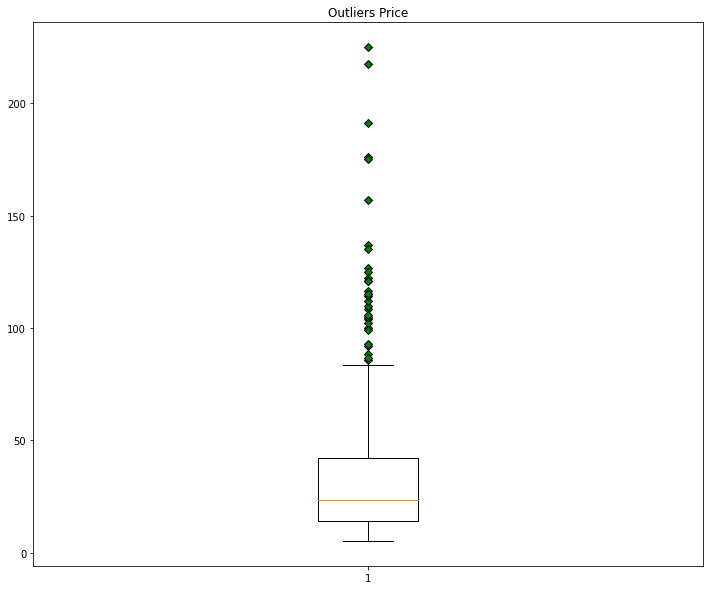

In [122]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots(1, figsize=(12, 10))
ax3.set_title('Outliers Price')
ax3.boxplot(df2["price"], flierprops=green_diamond)

Détection Multivariée des Outliers : Scatter Plot

#### Représentation graphique des outliers 

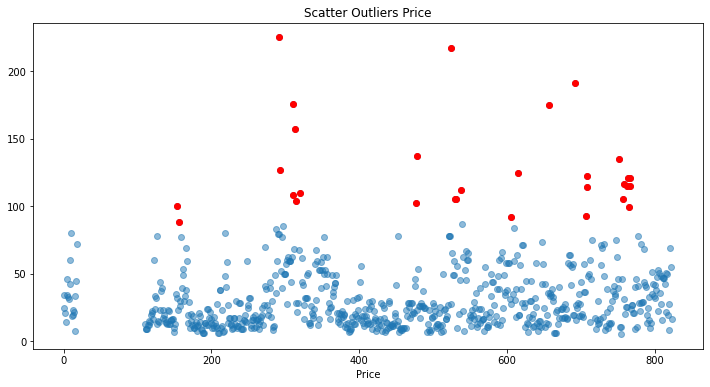

In [138]:
fig, axs = plt.subplots(1, figsize=(12, 6))

axs.scatter(df2["price"].index, "price",  alpha=0.5, data= df2)
axs.scatter(df2_only_out["price"].index, "price" ,c= "red",data=df2_only_out)
plt.title("Scatter Outliers Price")
plt.xlabel("Price")
plt.show()